In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

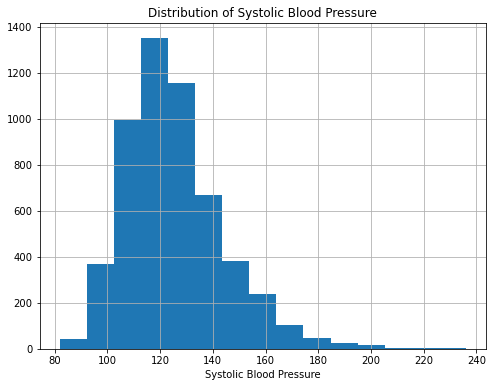

In [5]:
df['BPXSY1'].hist(bins = 15, figsize=(8, 6))
plt.xlabel("Systolic Blood Pressure")
plt.title("Distribution of Systolic Blood Pressure")
plt.show()

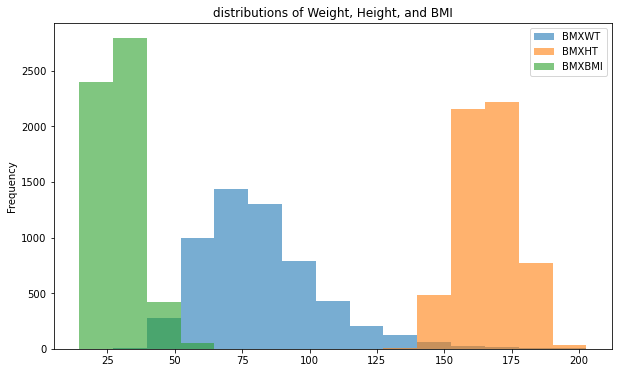

In [23]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.hist(bins = 15, figsize=(10,6),
                                          alpha = 0.6)
plt.title("distributions of Weight, Height, and BMI")
plt.show()

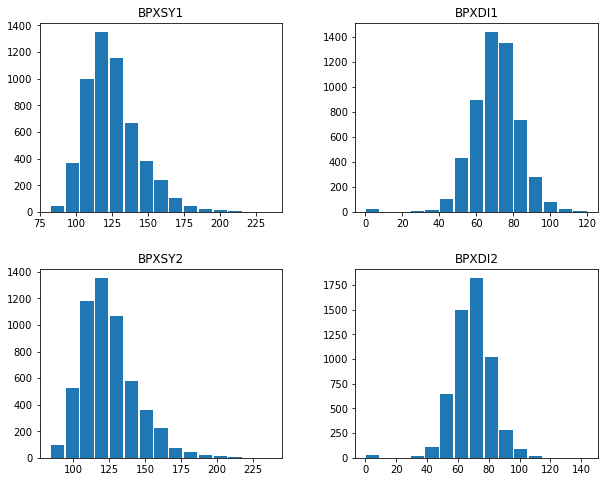

In [25]:
df[['BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2']].hist(
    bins=15,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
)
plt.show()

In [30]:
df['DMDEDUC2'].unique()

array([ 5.,  3.,  4.,  2., nan,  1.,  9.])

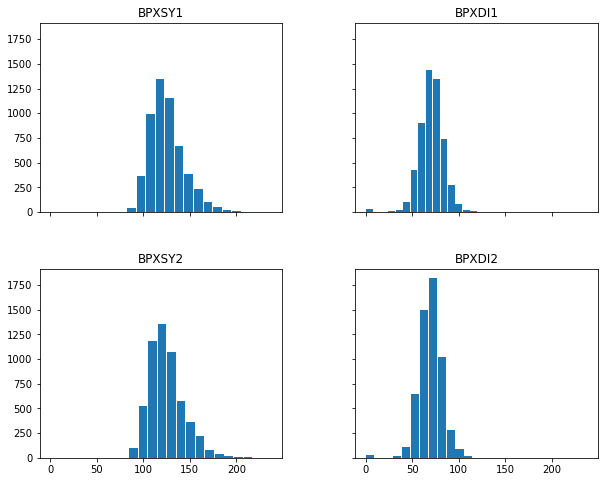

In [27]:
df[['BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2']].hist(
    bins=15,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
    sharex = True,
    sharey = True
)
plt.show()

In [9]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})

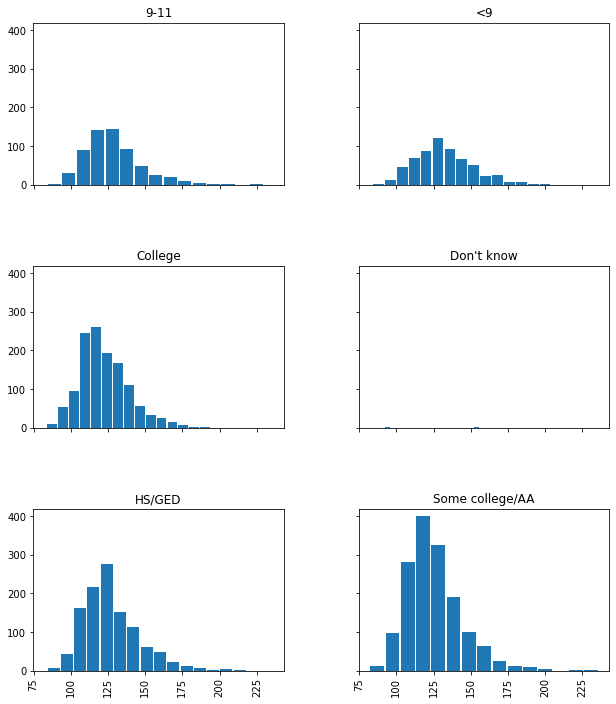

In [29]:
df.hist(column = "BPXSY1",
        by = "DMDEDUC2x",
        bins = 15,
        figsize=(10, 12),
        grid = False,
        rwidth = 0.9,
        sharex = True,
        sharey = True
       )

plt.show()

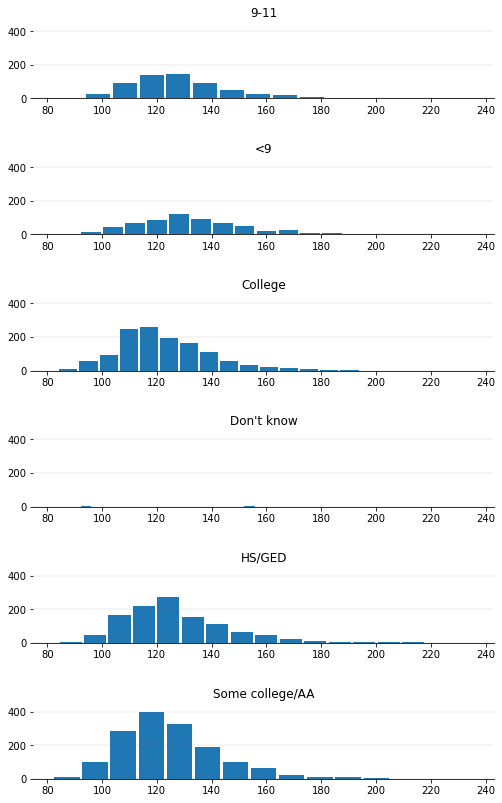

In [39]:
#plt.figure(figsize=(8, 25))
ax = df.hist(column = "BPXSY1",
        by = "DMDEDUC2x",
        bins = 15,
        figsize=(8, 14),
        grid = False,
        rwidth = 0.9,
        sharex = True,
        sharey = True,
        layout=(6, 1)
       )

for x in ax:
    #Removing the left, right and top lines of the box of each plot
    x.spines['right'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.spines['top'].set_visible(False)
    
    #Adding the x-ticks on each plot
    x.tick_params(axis="both", labelbottom = 'on')
    x.tick_params(axis='x', rotation = 0)
    
    plt.ylim(0, 450)
    
    vals = x.get_yticks()
    
    #Getting the grey horizontal grids in each plot
    for v in vals:
        x.axhline(y = v, linestyle="solid", color = 'gray', alpha = 0.1)
        
#Adding some space between each plot
plt.subplots_adjust(hspace=0.8)
plt.show()

In [40]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"}) 